In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

# Deforestation Data

In [2]:
# We had to clean the .csv file
# Change the demiliter form ";" to ","
# Change the decimal separator from "," to "."
# Use the abreviation for the States.

# The deforestation data were found only for 9 the states of the Legal Amazon..

defo = "data_joao/deforestation_state_year_clean.csv"
defo_df = pd.read_csv(defo)
defo_df

,year,square km,state
0,2017,31.0,TO
1,2017,132.0,RR
2,2017,1243.0,RO
3,2017,2433.0,PA
4,2017,1561.0,MT
...,...,...,...
175,1998,6466.0,MT
176,1998,1012.0,MA
177,1998,30.0,AP
178,1998,670.0,AM


In [36]:
# group by year

defo_yeargroup_df = defo_df.groupby(["year"])
defo_year_sum = defo_yeargroup_df.sum()["square km"]
defo_year_sum_df = pd.DataFrame(defo_year_sum)

defo_year_sum_df = defo_year_sum_df.reset_index()
defo_year_sum_df.head()

,year,square km
0,1998,17383.0
1,1999,17259.0
2,2000,18226.0
3,2001,18165.0
4,2002,21650.0


In [4]:
x_axis = list(defo_year_sum_df.year)
tick_locations = [value for value in x_axis]

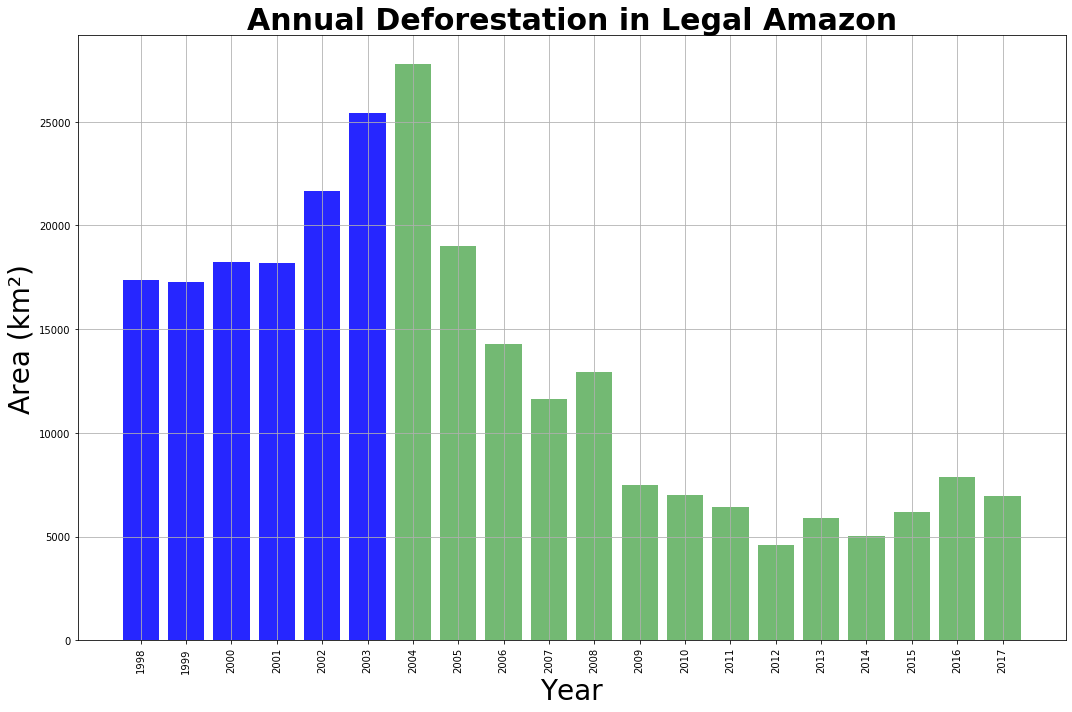

In [67]:
# Create a bar graph for Annual Deforestation in Legal Amazon.
fig, ax = plt.subplots(figsize=(15, 10))

for index, row in defo_year_sum_df.iterrows():
    
    if defo_year_sum_df["year"][index] < 2004:
        ax.bar(defo_year_sum_df["year"][index], defo_year_sum_df["square km"][index],  color='b', alpha=0.85, align="center")
    else:
        ax.bar(defo_year_sum_df["year"][index], defo_year_sum_df["square km"][index],  color='g', alpha=0.55, align="center")

ax.set_title("Annual Deforestation in Legal Amazon", fontweight = "bold", fontsize = 30)
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year",fontsize = 28)
ax.set_ylabel("Area (km²)",fontsize = 28)
#plt.style.use('ggplot')
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("output_data/defor_year.png", dpi=fig.dpi)
plt.show()

In [6]:
# group the data by year and state

defo_stategroup = defo_df.groupby(["state", "year"])
defo_state_sum = defo_stategroup.sum()["square km"]
defo_state_sum_df = pd.DataFrame(defo_state_sum)

defo_state_sum_df = defo_state_sum_df.reset_index()
defo_state_sum_df

,state,year,square km
0,AC,1998,536.0
1,AC,1999,441.0
2,AC,2000,547.0
3,AC,2001,419.0
4,AC,2002,883.0
...,...,...,...
175,TO,2013,74.0
176,TO,2014,50.0
177,TO,2015,57.0
178,TO,2016,58.0


In [7]:
states = np.unique(defo_state_sum_df["state"])

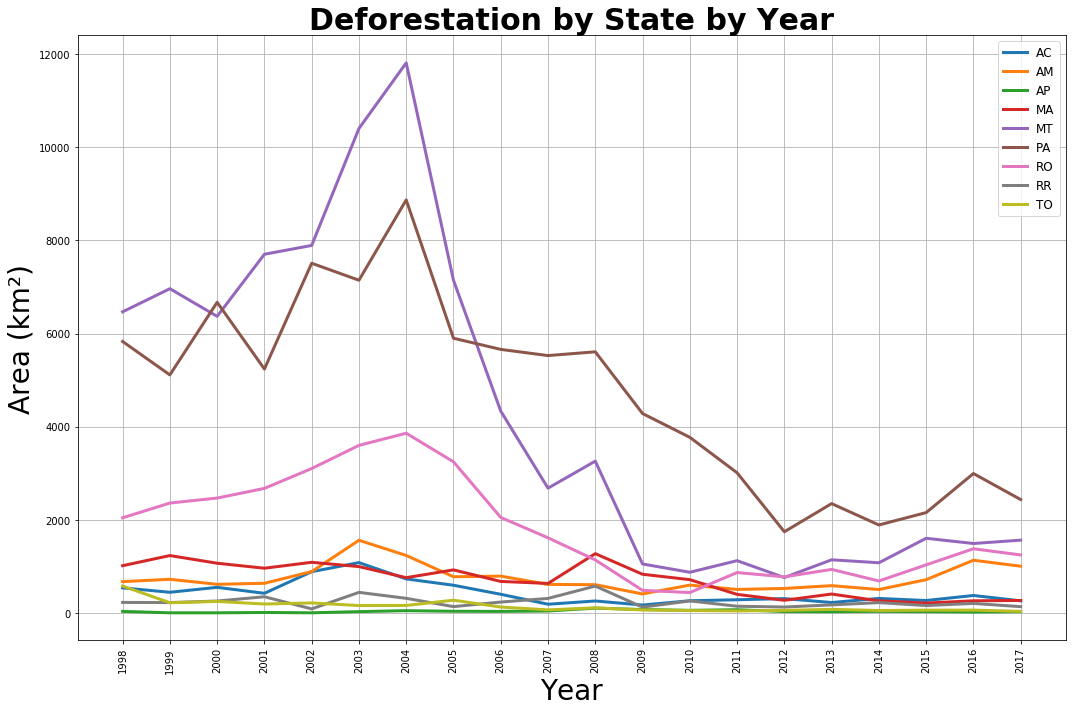

In [65]:
#create line graph Annual Deforestation by state

fig, ax = plt.subplots(figsize=(15, 10), )

ax = sns.lineplot(x = 'year', y = "square km", data = defo_state_sum_df, hue = 'state', lw = 3, 
                  err_style = None,)

tick_locations = [value for value in x_axis]
handles = states
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year",fontsize = 28)
ax.set_ylabel("Area (km²)",fontsize = 28)
ax.set_title('Deforestation by State by Year', fontweight = "bold", fontsize = 30)
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()
plt.savefig("output_data/def_state_year.png", dpi=fig.dpi)
plt.show()

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)

In [9]:
# Create 2 dataframe one with the means and one with the sum of Deforestation 
state_mean_df = pd.DataFrame(defo_df.groupby(["state"], as_index = False)["square km"].mean())
state_sum_df = pd.DataFrame(defo_df.groupby(["state"], as_index = False)["square km"].sum())

In [10]:
# Saving the DataFrames in .csv files
defo_state_sum_df.to_csv("output_data/deforestation_merge.csv",index=False)
state_mean_df.to_csv("output_data/deforestation_mean_merge.csv")
state_sum_df.to_csv("output_data/deforestation_sum_merge.csv")

# Deforestation vs Rain

In [11]:
rain = "output_data/amazon_precipitation.csv"
rain_df = pd.read_csv(rain)
rain_df = rain_df[["state", "year", "precipitation" ]]
rain_df

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
155,TO,2013,1849.3
156,TO,2014,1843.9
157,TO,2015,1393.7
158,TO,2016,1270.5


In [12]:
# The Rondonia state (RO) is missing from the Rain data, the merged data will have only 8 of the 9 states from Legal Amazon.
defo_rain_df = pd.merge(defo_state_sum_df, rain_df, on=['year', 'state'])
defo_rain_df

,state,year,square km,precipitation
0,AC,1998,536.0,2296.1
1,AC,1999,441.0,2182.2
2,AC,2000,547.0,1703.5
3,AC,2001,419.0,1926.9
4,AC,2002,883.0,1909.9
...,...,...,...,...
155,TO,2013,74.0,1849.3
156,TO,2014,50.0,1843.9
157,TO,2015,57.0,1393.7
158,TO,2016,58.0,1270.5


In [13]:
# Group by year and 
defo_rain_group_df = defo_rain_df.groupby(["year"])
defo_rain_sum_df = defo_rain_group_df.sum()
defo_rain_sum_df = pd.DataFrame(defo_rain_sum_df).reset_index()

defo_rain_sum_df

,year,square km,precipitation
0,1998,15342.0,16444.3
1,1999,14901.0,18499.7
2,2000,15761.0,18510.7
3,2001,15492.0,16345.5
4,2002,18551.0,15949.3
5,2003,21799.0,15834.6
6,2004,23914.0,17218.5
7,2005,15770.0,16782.1
8,2006,12237.0,19357.0
9,2007,10040.0,17513.3


In [14]:
x_axis_defo_rain = list(defo_rain_sum_df.year)
tick_locations = [value for value in x_axis_defo_rain]

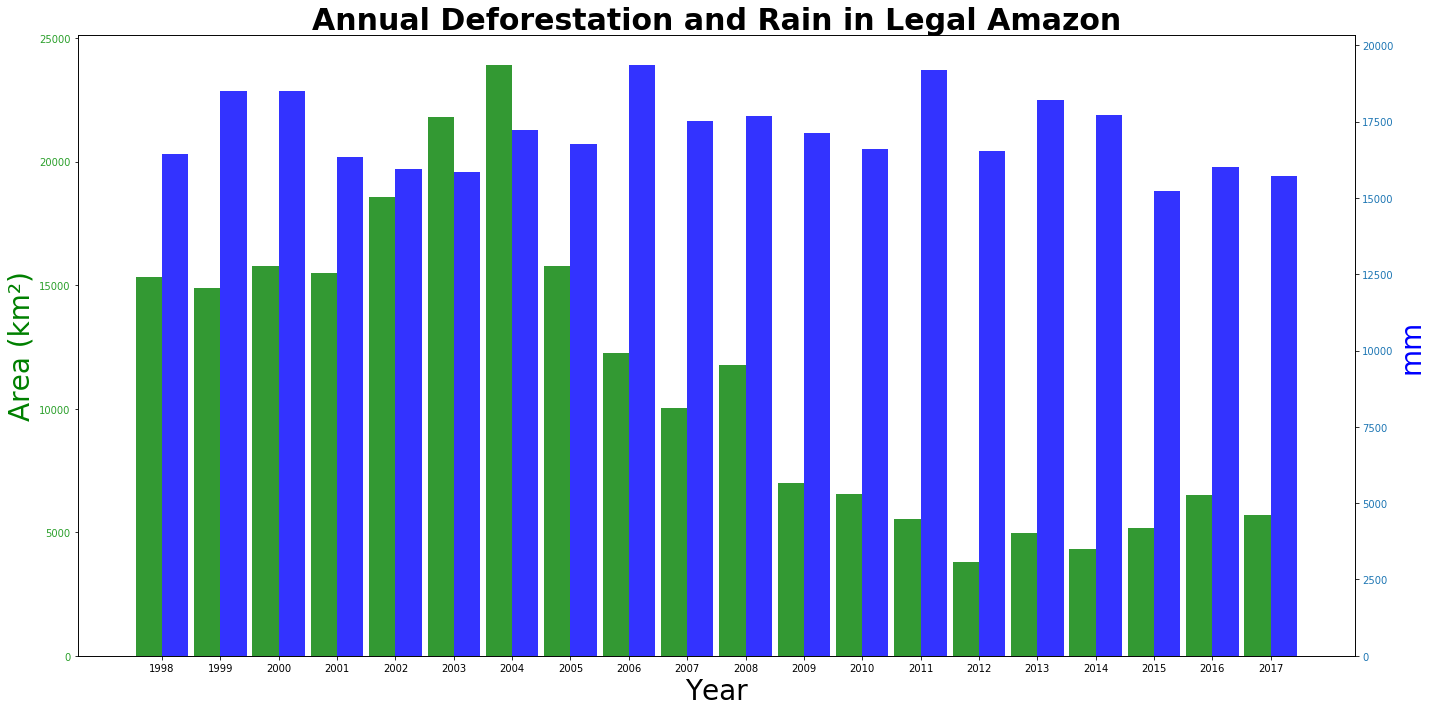

In [68]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in defo_rain_sum_df.iterrows():
    def_graph = ax1.bar(defo_rain_sum_df["year"][index], defo_rain_sum_df["square km"][index],  color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Deforestation and Rain in Legal Amazon", fontweight = "bold", fontsize = 30)
ax1.set_xlabel("Year",fontsize = 28)
ax1.set_ylabel("Area (km²)",fontsize = 28, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green')

# Rain
ax2 = ax1.twinx()
for index, row in defo_rain_sum_df.iterrows():
    rain_graph = ax2.bar(defo_rain_sum_df["year"][index], defo_rain_sum_df["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("mm",fontsize = 28, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')

#other configurations
plt.xticks(tick_locations, x_axis_defo_rain, rotation=90)
plt.tight_layout()
ax.grid()

#save figure
plt.savefig("output_data/defor_rain_year.png", dpi=fig.dpi)
plt.show()

[[-0.00896131]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              64.38
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                    1.60e-07
Time:                        18:28:52   Log-Likelihood:                         -202.67
No. Observations:                  20   AIC:                                      407.3
Df Residuals:                      19   BIC:                                      408.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

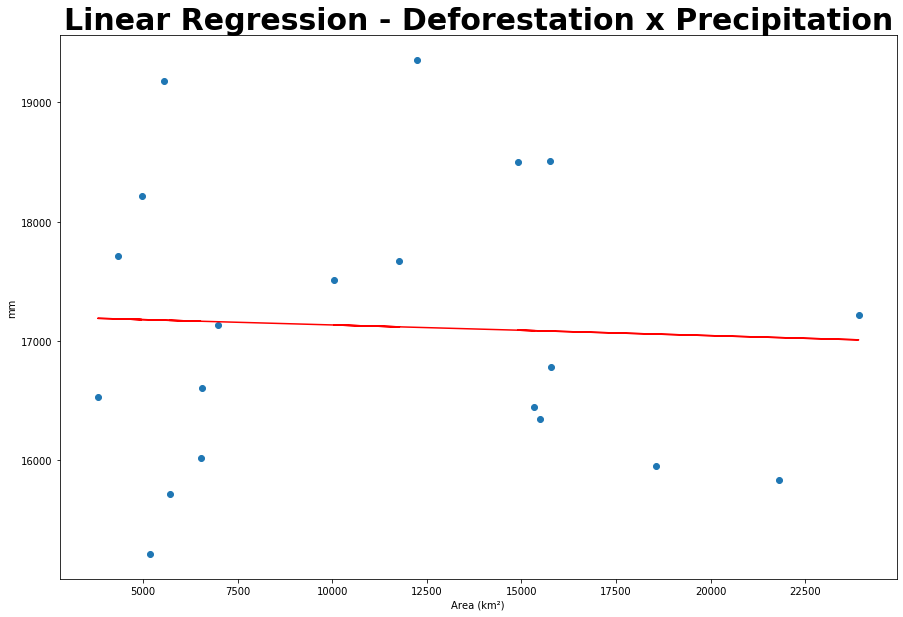

In [80]:
# Correlation Deforestation x Rain

fig, ax = plt.subplots(figsize=(15, 10))

X = defo_rain_sum_df['square km'].values.reshape(-1, 1)
Y = defo_rain_sum_df['precipitation'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)
# correlation matrices
#correlation coefficient

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
#plt.set_xlabel("mm",fontsize = 18, color ='b')


print(linear_regressor.coef_)
# Correlation Coefficient
# and R-square
defo_rain_sum_df.corr(method ='pearson')
model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())
plt.title("Linear Regression - Deforestation x Precipitation", fontweight = "bold", fontsize = 30)
plt.xlabel("Area (km²)")
plt.ylabel("mm")
plt.savefig("output_data/lr_def_rain.png", dpi=fig.dpi)
plt.show()


In [56]:
defo_matrix = defo_df.pivot(index='year', columns='state', values='square km')
defo_matrix

state,AC,AM,AP,MA,MT,PA,RO,RR,TO
year,,,,,,,,,
1998,536.0,670.0,30.0,1012.0,6466.0,5829.0,2041.0,223.0,576.0
1999,441.0,720.0,0.0,1230.0,6963.0,5111.0,2358.0,220.0,216.0
2000,547.0,612.0,0.0,1065.0,6369.0,6671.0,2465.0,253.0,244.0
2001,419.0,634.0,7.0,958.0,7703.0,5237.0,2673.0,345.0,189.0
2002,883.0,885.0,0.0,1085.0,7892.0,7510.0,3099.0,84.0,212.0
2003,1078.0,1558.0,25.0,993.0,10405.0,7145.0,3597.0,439.0,156.0
2004,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0
2005,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0
2006,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0


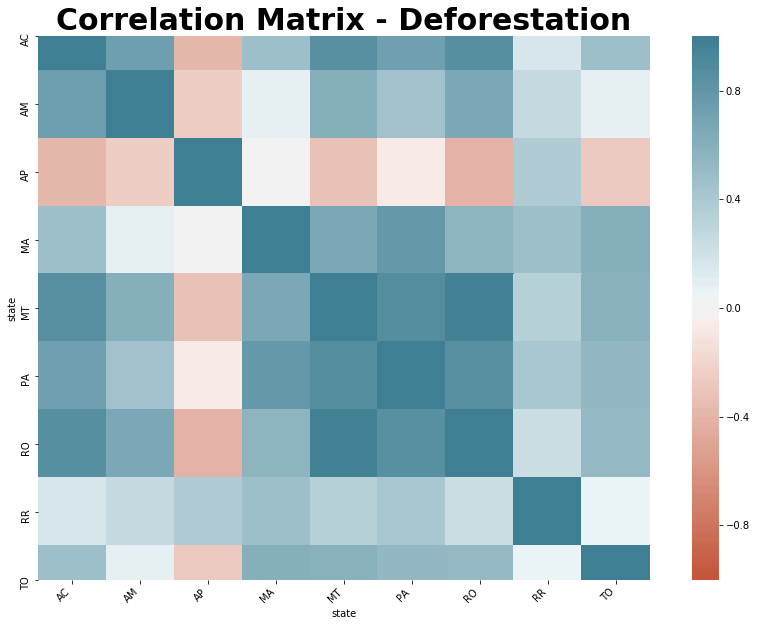

In [71]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

fig, ax = plt.subplots(figsize=(15, 10))

corr = defo_matrix.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("Correlation Matrix - Deforestation", fontweight = "bold", fontsize = 30)
plt.savefig("output_data/cor_matr_defo.png", dpi=fig.dpi)


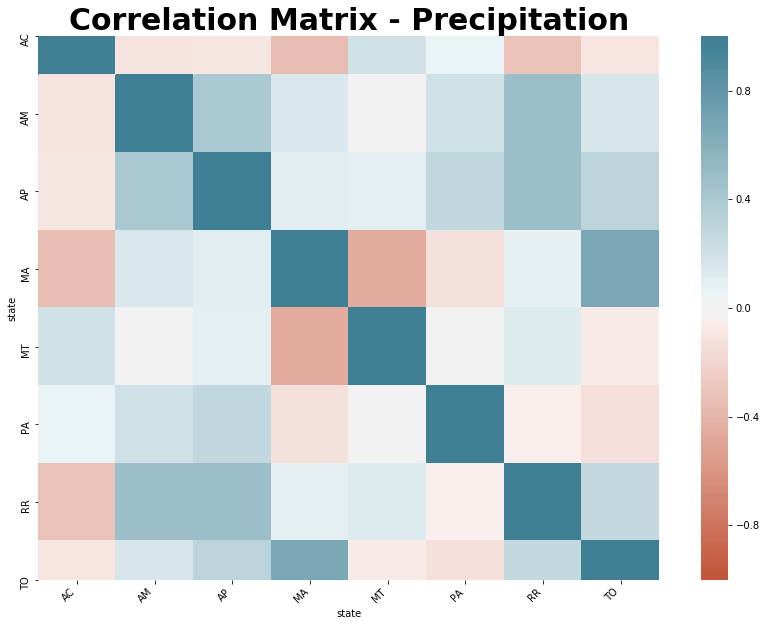

In [72]:
rain_matrix = rain_df.pivot(index='year', columns='state', values='precipitation')
rain_matrix


fig, ax = plt.subplots(figsize=(15, 10))

corr = rain_matrix.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("Correlation Matrix - Precipitation", fontweight = "bold", fontsize = 30)
plt.savefig("output_data/cor_matr_precip.png", dpi=fig.dpi)
